In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib import colors
import numpy as np
from mflex.model.field.utility.height_profile import f_low, f

In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z
nf_max = 200
L = 1.0
print(xmin, ymin, zmin)
print(xmax, ymax, zmax)
print(pixelsize_x, pixelsize_y, pixelsize_z)

# Background atmosphere parameters
z0 = 0.2
deltaz = 0.02

b = 1.0

# Magnitc field parameters
z0_b = 0.2
deltaz_b = 0.02

a = 0.22
alpha = 0.25
a_low = a * (1 - np.tanh(-z0 / deltaz))
kappa = -np.log(a / a_low) / z0
kappa = 1 / z0

# Figure 1
z_arr: np.ndarray[np.float64, np.dtype[np.float64]] = (
    np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
)

f_const = np.zeros(nresol_z)
f_exp = np.zeros(nresol_z)
f_tanh = np.zeros(nresol_z)

for iz in range(0, nresol_z):
    z = z_arr[iz]
    f_const[iz] = a * (1 - np.tanh(-z0 / deltaz_b))
    f_exp[iz] = f_low(z, a_low, kappa)
    f_tanh[iz] = f(z, z0, deltaz, a, b)

0.0 0.0 0.0
2.0 2.0 2.0
0.01 0.01 0.005


In [4]:
from matplotlib import rc

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

In [5]:
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

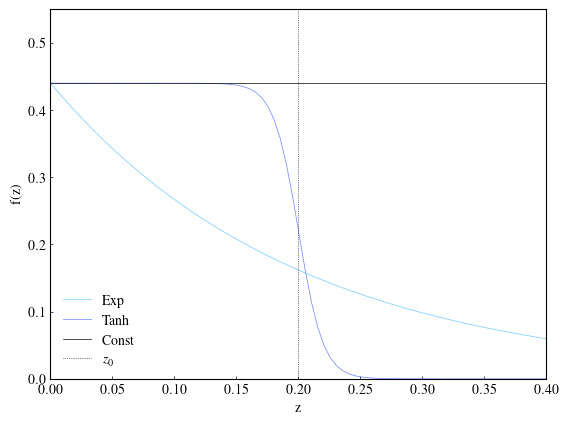

In [6]:
plt.plot(
    z_arr,
    f_exp,
    linewidth=0.5,
    color=c1,
    # linestyle="dashed",
    label="Exp",
)
plt.plot(
    z_arr,
    f_tanh,
    linewidth=0.5,
    color=c2,
    # linestyle="solid",
    label="Tanh",
)
plt.plot(
    z_arr,
    f_const,
    linewidth=0.5,
    color=c3,
    # linestyle="dotted",
    label="Const",
)
plt.axvline(x=z0_b, color="black", linestyle="dotted", linewidth=0.5, label=r"$z_0$")
plt.legend(frameon=False)
plt.xlabel("z")
plt.ylabel("f(z)")
# plt.xticks([])
# plt.yticks([])
plt.xlim([0, 2 * z0])
plt.ylim([0, 2.5 * a])
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/heightprofiles.png"
# plt.savefig(plotname, dpi=300)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = "/Users/lilli/Desktop/Colortests/color_test_f.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [7]:
from mflex.simulate.simulate_boundary import dipole

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin

data_bz = np.zeros((nresol_y, nresol_x))

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y)

In [8]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#cmap=6B80FF-FFFFFF-FF3960
        (0.000, (0.420, 0.502, 1.000)),
        (0.500, (1.000, 1.000, 1.000)),
        (1.000, (1.000, 0.224, 0.376)),
    ),
)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

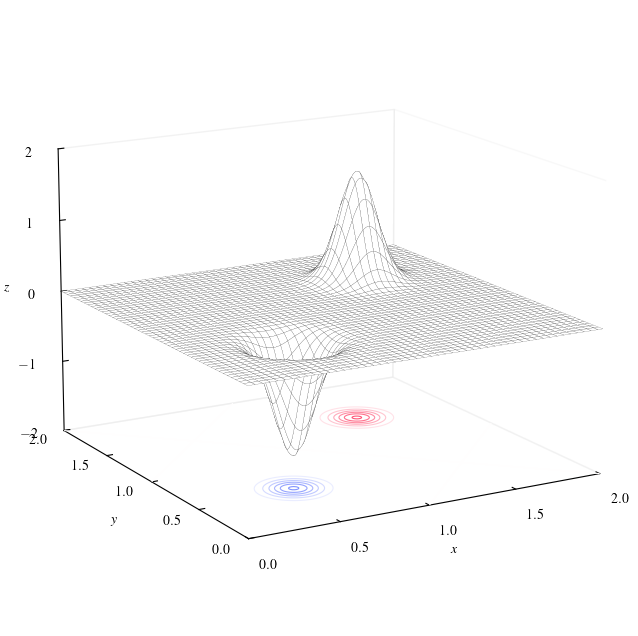

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_plot,
    x_plot,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=4,
    rstride=4,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_plot, x_plot, data_bz, 12, linewidths=0.8, zdir="z", offset=-2, cmap=cmap
)

ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.zaxis.set_major_locator(MultipleLocator(1.0))

ax.view_init(15, -120, 0)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zlim(-2, 2)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour1.png"
plt.savefig(plotname, dpi=300)
plt.show()

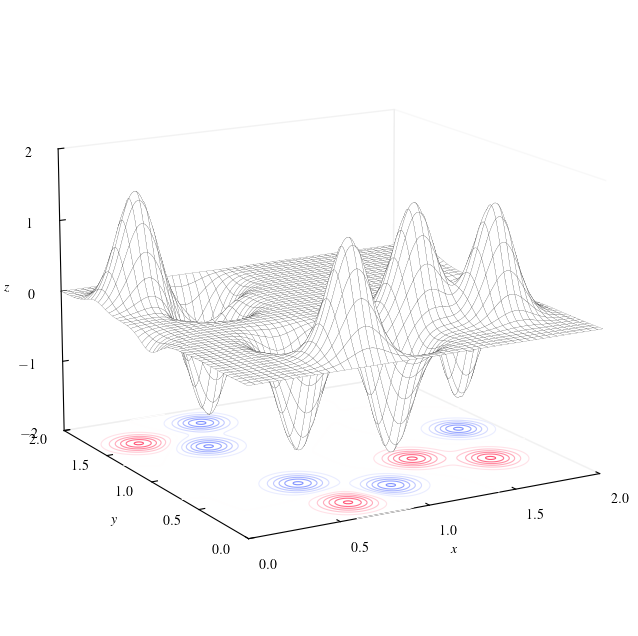

In [11]:
from mflex.simulate.simulate_boundary import dalmatian

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin

data_bz = np.zeros((nresol_y, nresol_x))

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dalmatian(x, y)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_plot,
    x_plot,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=4,
    rstride=4,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_plot, x_plot, data_bz, 12, linewidths=0.8, zdir="z", offset=-2, cmap=cmap
)


ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.zaxis.set_major_locator(MultipleLocator(1.0))

ax.view_init(15, -120, 0)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zlim(-2, 2)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour2.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [12]:
from mflex.load.read_file import read_issi_analytical

data = read_issi_analytical(
    "/Users/lilli/Desktop/mflex/data/Analytic_boundary_data.sav", L
)
# BFieldvec_Seehafer = np.load('field_data_potential.npy')

data_bx = data.data_x
data_by = data.data_y
data_bz = data.data_z
nresol_x = data.nresol_x
nresol_y = data.nresol_y
nresol_z = data.nresol_z
pixelsize_x = data.pixelsize_x
pixelsize_y = data.pixelsize_y
pixelsize_z = data.pixelsize_z
nf_max = data.nf_max
xmin = data.xmin
xmax = data.xmax
ymin = data.ymin
ymax = data.ymax
zmin = data.zmin
zmax = data.zmax
z0 = data.z0

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

--------------------------------------------------
Date: Tue Sep  6 15:16:46 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 33 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 1 are of type NOTICE
 - 29 are of type VARIABLE
--------------------------------------------------
Available variables:
 - b2dx1 [<class 'numpy.ndarray'>]
 - b2dy1 [<class 'numpy.ndarray'>]
 - b2dz1 [<class 'numpy.ndarray'>]
 - d2d1 [<class 'numpy.ndarray'>]
 - b2dx2 [<class 'numpy.ndarray'>]
 - b2dy2 [<class 'numpy.ndarray'>]
 - b2dz2 [<class 'numpy.ndarray'>]
 - d2d2 [<class 'numpy.ndarray'>]
 - b2dx3 [<class 'numpy.ndarray'>]
 - b2dy3 [<class 'numpy.ndarray'>]
 - b2dz3 [<class 'numpy.ndarray'>]
 - d2d3 [<class 'numpy.ndarray'>]
 - b2dx4 [<class 'numpy.ndarray'>]
 - b2dy4 [<class 'numpy.ndarray'>]
 - b2dz4 [<class '

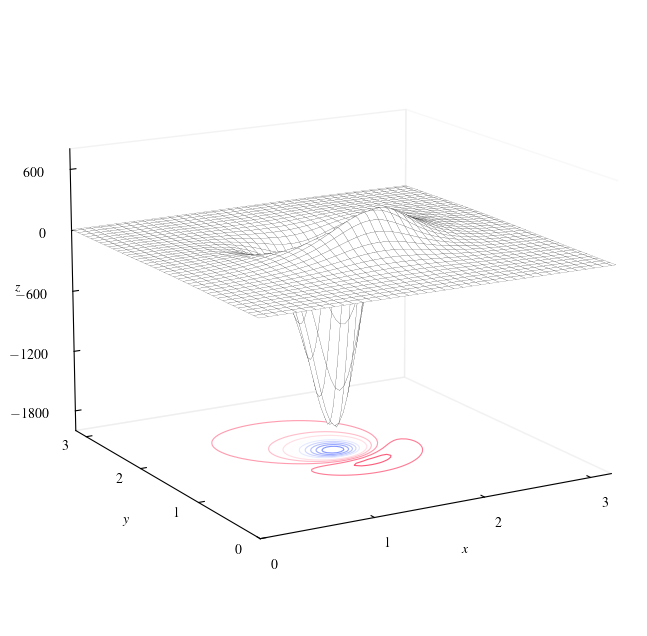

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_grid,
    x_grid,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=2,
    rstride=2,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_grid, x_grid, data_bz, 12, linewidths=0.8, zdir="z", offset=-2000, cmap=cmap
)


ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.zaxis.set_major_locator(MultipleLocator(600.0))

ax.view_init(15, -120, 0)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zlim(-2000, 800)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour3.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [14]:
from mflex.load.read_file import read_issi_rmhd

data = read_issi_rmhd("/Users/lilli/Desktop/mflex/data/RMHD_boundary_data.sav", L)
# BFieldvec_Seehafer = np.load('field_data_potential.npy')

data_bx = data.data_x
data_by = data.data_y
data_bz = data.data_z
nresol_x = data.nresol_x
nresol_y = data.nresol_y
nresol_z = data.nresol_z
pixelsize_x = data.pixelsize_x
pixelsize_y = data.pixelsize_y
pixelsize_z = data.pixelsize_z
nf_max = data.nf_max
xmin = data.xmin
xmax = data.xmax
ymin = data.ymin
ymax = data.ymax
zmin = data.zmin
zmax = data.zmax
z0 = data.z0

deltaz = z0 / 10.0  # z0 at 2Mm so widht of transition region = 200km

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

--------------------------------------------------
Date: Tue Sep  6 15:18:26 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 10 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 1 are of type NOTICE
 - 6 are of type VARIABLE
--------------------------------------------------
Available variables:
 - b2dx [<class 'numpy.ndarray'>]
 - b2dy [<class 'numpy.ndarray'>]
 - b2dz [<class 'numpy.ndarray'>]
 - info_unit [<class 'bytes'>]
 - info_pixel [<class 'bytes'>]
 - info_array [<class 'bytes'>]
--------------------------------------------------
b'b2d: magnetic vector (Gauss)'
b'Pixel size: 192km*192km'
b'Array example: b2dx(nx,ny)'
xmax, ymax, zmax 98.304 49.152 41.6
xmax_Mm, ymax_Mm, zmax_Mm 98.304 49.152 41.6
nresol_x, nresol_y, nresol_z 512 256 650
pixelsize_x, pixelsize_x_Mm 0.192 0.192
pixelsi

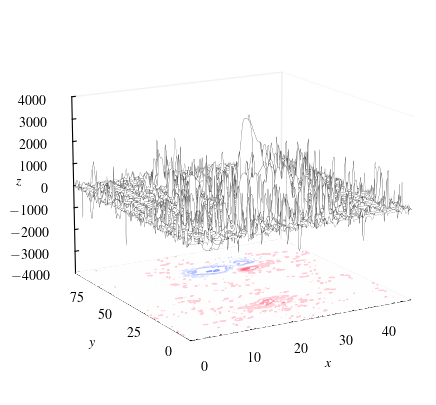

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_grid,
    x_grid,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=14,
    rstride=14,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_grid, x_grid, data_bz, 6, linewidths=0.8, zdir="z", offset=-4000, cmap=cmap
)
ax.clabel(cset, fontsize=5, inline=True)

ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(10.0))
ax.yaxis.set_major_locator(MultipleLocator(25.0))
ax.zaxis.set_major_locator(MultipleLocator(1000.0))

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(15, -120, 0)

ax.set_zlim(-4000, 4000)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour4.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [16]:
from sunpy.net import Fido, attrs as a
import astropy.units as u
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import numpy as np
from astropy.coordinates import SkyCoord
import sunpy.map
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib import colors

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#cmap=000000-A8A8A8-FFFFFF
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

In [18]:
print(Fido)
result = Fido.search(
    a.Time("2024/5/07 07:30:00", "2024/5/07 07:31"),
    a.Instrument.hmi,
    a.Physobs("LOS_magnetic_field"),
)

downloaded_files = Fido.fetch(result)
path = "/Users/lilli/sunpy/data/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()
hdr = hmi_image.fits_header

left_corner = SkyCoord(
    Tx=-142 * u.arcsec, Ty=-350 * u.arcsec, frame=hmi_image.coordinate_frame
)
right_corner = SkyCoord(
    Tx=158 * u.arcsec, Ty=-150 * u.arcsec, frame=hmi_image.coordinate_frame
)


dist = hdr["DSUN_OBS"]
pixelsize_x_unit = hdr["CUNIT1"]
pixelsize_y_unit = hdr["CUNIT2"]
pixelsize_x_arcsec = hdr["CDELT1"]
pixelsize_y_arcsec = hdr["CDELT2"]

if not pixelsize_x_unit == pixelsize_y_unit:
    print("Pixelsize units not matchy-matchy")
    raise ValueError
if not pixelsize_x_arcsec == pixelsize_y_arcsec:
    print("Data pixelsizes in x and y direction not matchy-matchy")
    raise ValueError
else:
    pixelsize_radians = pixelsize_x_arcsec / 206265.0
dist_km = dist / 1000.0
pixelsize_Mm = np.floor(pixelsize_radians * dist_km) * 10**-3

hpc_coords = sunpy.map.all_coordinates_from_map(hmi_image)
mask = ~sunpy.map.coordinate_is_on_solar_disk(hpc_coords)
magnetogram_big = sunpy.map.Map(hmi_image.data, hmi_image.meta, mask=mask)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


Files Downloaded: 100%|██████████| 1/1 [00:01<00:00,  1.50s/file]


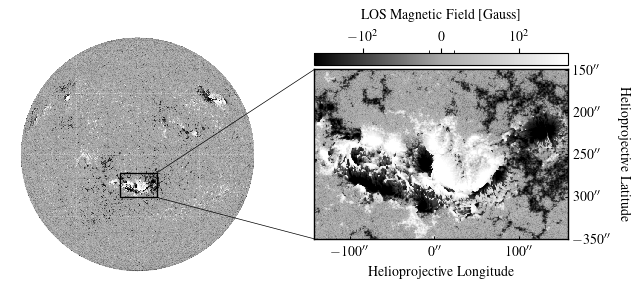

xmax, ymax, zmax 219.328 146.464 20.0
xmax_Mm, ymax_Mm, zmax_Mm 219.328 146.464 20.0
nresol_x, nresol_y, nresol_z 596 398 222
pixelsize_x, pixelsize_x_Mm 0.368 0.368
pixelsize_y, pixelsize_y_Mm 0.368 0.368
pixelsize_z, pixelsize_z_Mm 0.368 0.368


In [19]:
fig = plt.figure(figsize=(7.2, 4.8))
norm = matplotlib.colors.SymLogNorm(50, vmin=-7.5e2, vmax=7.5e2)
ax1 = fig.add_subplot(121, projection=magnetogram_big)
magnetogram_big.plot(
    axes=ax1,
    cmap=cmap,
    norm=norm,
    annotate=False,
)
magnetogram_big.draw_grid(axes=ax1, color="black", linestyle="dotted", lw=0.2)

for coord in ax1.coords:
    coord.frame.set_linewidth(0)
    coord.set_ticks_visible(False)
    coord.set_ticklabel_visible(False)

magnetogram_big.draw_quadrangle(
    left_corner, top_right=right_corner, edgecolor="black", lw=1
)
magnetogram_small = hmi_image.submap(left_corner, top_right=right_corner)
ax2 = fig.add_subplot(122, projection=magnetogram_small)
im = magnetogram_small.plot(
    axes=ax2,
    norm=norm,
    cmap=cmap,
    annotate=False,
)
ax2.grid(alpha=0)

lon, lat = ax2.coords[0], ax2.coords[1]
lon.frame.set_linewidth(1)
lat.frame.set_linewidth(1)
lon.set_axislabel(
    "Helioprojective Longitude",
)
lon.set_ticks_position("b")
lat.set_axislabel(
    "Helioprojective Latitude",
)
lat.set_axislabel_position("r")
lat.set_ticks_position("r")
lat.set_ticklabel_position("r")

xpix, ypix = magnetogram_big.wcs.world_to_pixel(right_corner)
con1 = ConnectionPatch(
    (0, 1),
    (xpix, ypix),
    "axes fraction",
    "data",
    axesA=ax2,
    axesB=ax1,
    arrowstyle="-",
    color="black",
    lw=0.5,
)
xpix, ypix = magnetogram_big.wcs.world_to_pixel(
    SkyCoord(right_corner.Tx, left_corner.Ty, frame=magnetogram_big.coordinate_frame)
)
con2 = ConnectionPatch(
    (0, 0),
    (xpix, ypix),
    "axes fraction",
    "data",
    axesA=ax2,
    axesB=ax1,
    arrowstyle="-",
    color="black",
    lw=0.5,
)
ax2.add_artist(con1)
ax2.add_artist(con2)

ax2.tick_params(direction="in", length=2, width=0.5)

pos = ax2.get_position().get_points()
cax = fig.add_axes([pos[0, 0], pos[1, 1] + 0.01, pos[1, 0] - pos[0, 0], 0.025])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.locator = matplotlib.ticker.FixedLocator([-1e2, 0, 1e2])
cbar.set_label("LOS Magnetic Field [Gauss]", labelpad=-40, rotation=0)
cbar.update_ticks()
cbar.ax.xaxis.set_ticks_position("top")

plotname = "/Users/lilli/Desktop/Paper/SDO_observation.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

nresol_x = magnetogram_small.data.shape[1]
nresol_y = magnetogram_small.data.shape[0]

xmax_Mm = nresol_x * pixelsize_Mm
ymax_Mm = nresol_y * pixelsize_Mm
pixelsize_z_Mm = 90.0 * 10**-3

zmax_Mm = 20000.0 * 10**-3

xmin = np.float64(0.0)  # Minimum value of x in data length scale, not in Mm
ymin = np.float64(0.0)  # Minimum value of y in data length scale, not in Mm
zmin = np.float64(0.0)  # Minimum value of z in data length scale, not in Mm

nresol_z = int(np.floor(zmax_Mm / pixelsize_z_Mm))

z0 = 2000.0 * 10**-3

nf_max = min(nresol_x, nresol_y)

xmax = xmax_Mm
ymax = ymax_Mm
zmax = zmax_Mm
z0 = z0

pixelsize_x = pixelsize_Mm
pixelsize_y = pixelsize_Mm
pixelsize_z = pixelsize_Mm
print("xmax, ymax, zmax", xmax, ymax, zmax)
print("xmax_Mm, ymax_Mm, zmax_Mm", xmax_Mm, ymax_Mm, zmax_Mm)
print("nresol_x, nresol_y, nresol_z", nresol_x, nresol_y, nresol_z)
print("pixelsize_x, pixelsize_x_Mm", pixelsize_x, pixelsize_Mm)
print("pixelsize_y, pixelsize_y_Mm", pixelsize_y, pixelsize_Mm)
print("pixelsize_z, pixelsize_z_Mm", pixelsize_z, pixelsize_Mm)

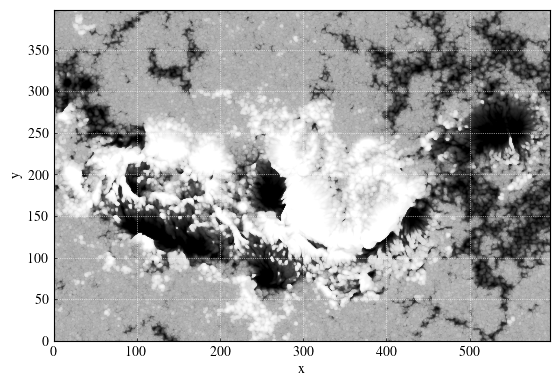

In [20]:
x_arr = np.arange(nresol_x) * (nresol_x) / (nresol_x - 1)
y_arr = np.arange(nresol_y) * (nresol_y) / (nresol_y - 1)
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

fig = plt.figure()
ax = fig.add_subplot(111)
norm = matplotlib.colors.SymLogNorm(50, vmin=-7.5e2, vmax=7.5e2)
ax.grid(color="white", linestyle="dotted", linewidth=0.5)
ax.contourf(y_plot, x_plot, magnetogram_small.data, 1000, norm=norm, cmap=cmap)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.tick_params(direction="in", length=2, width=0.5)
ax.set_box_aspect(ymax / xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_magnetogram.png"
plt.savefig(plotname, dpi=300)
plt.show()

from mflex.classes.clsmod import DataBz

data = DataBz(
    magnetogram_small.data,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    nf_max,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    z0,
)

data_bz = data.data_z
x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

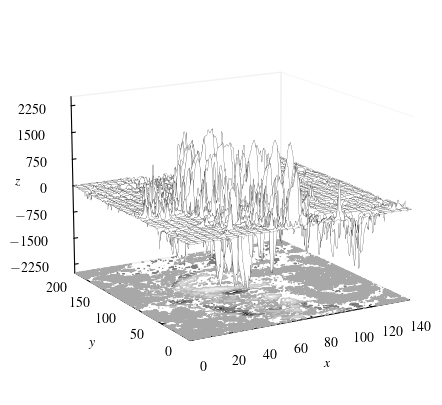

In [21]:
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_grid,
    x_grid,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=14,
    rstride=14,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_grid, x_grid, data_bz, 6, linewidths=0.8, zdir="z", offset=-2500, cmap=cmap
)
ax.clabel(cset, fontsize=5, inline=True)

ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(20.0))
ax.yaxis.set_major_locator(MultipleLocator(50.0))
ax.zaxis.set_major_locator(MultipleLocator(750.0))

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(15, -120, 0)

ax.set_zlim(-2500, 2500)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour5.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [22]:
z0_b = z0
deltaz_b = z0 / 10.0
L = 1.0
# a = 0.2
# alpha = 0.008
b = 1.0

alpha = 0.0025
a = 0.4

length_scale = float(2.0 * L)  # Normalising length scale for Seehafer

length_scale_x = 2.0 * nresol_x * pixelsize_x * L
length_scale_y = 2.0 * nresol_y * pixelsize_y * L

length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

kx_arr = np.arange(nf_max) * np.pi / length_scale_x_norm  # [0:nf_max]
ky_arr = np.arange(nf_max) * np.pi / length_scale_y_norm  # [0:nf_max]
one_arr = 0.0 * np.arange(nf_max) + 1.0

ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]

# kx^2 + ky^2

k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale_x_norm) ** 2 + (np.pi / length_scale_y_norm) ** 2


# Need k^2 > alpha^2/(1-2a) and k^2 > alpha^2

limit = (k2_arr - (2 * alpha) ** 2) / (2 * k2_arr)

print(limit.min())

0.43907459505331026


In [23]:
bfield = np.load(
    "/Users/lilli/Desktop/Paper/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram_mflex_"
    + str(a)
    + "_"
    + str(alpha)
    + "_1.0_bfield3d.npy"
)

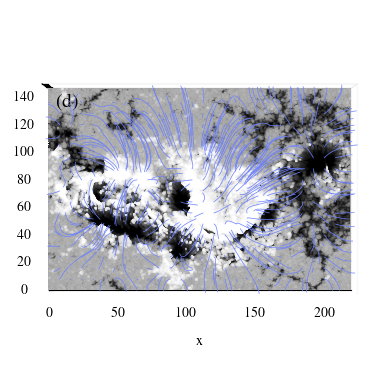

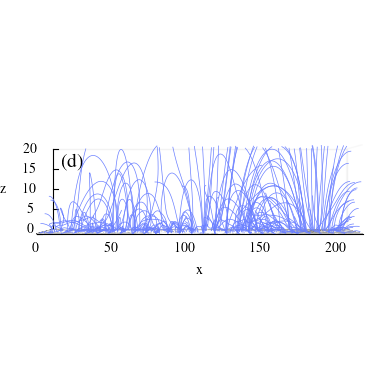

In [24]:
from mflex.plot.plot_magnetogram import plot_fieldlines_sdo_paper, plot_fieldlines_sdo_paper_zoom

x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

h1 = L / 100.0  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = L  # Maximum step length for fieldline3D

plot_fieldlines_sdo_paper(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=8,
    view="top",
    cmap=cmap,
)

plot_fieldlines_sdo_paper(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=8,
    view="side",
    cmap=cmap,
)

In [25]:
bfield_lff = np.load(
    "/Users/lilli/Desktop/Paper/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram_mflex_"
    + str(0.0)
    + "_"
    + str(0.0025)
    + "_1.0_bfield3d.npy"
)

bfield_mhs1 = np.load(
    "/Users/lilli/Desktop/Paper/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram_mflex_"
    + str(0.2)
    + "_"
    + str(0.0025)
    + "_1.0_bfield3d.npy"
)


bfield_mhs2 = np.load(
    "/Users/lilli/Desktop/Paper/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram_mflex_"
    + str(0.4)
    + "_"
    + str(0.0025)
    + "_1.0_bfield3d.npy"
)

In [26]:
dbfield_lff = np.load(
    "/Users/lilli/Desktop/Paper/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram_mflex_"
    + str(0.0)
    + "_"
    + str(0.0025)
    + "_1.0_dbzdxdydz3d.npy"
)

dbfield_mhs1 = np.load(
    "/Users/lilli/Desktop/Paper/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram_mflex_"
    + str(0.2)
    + "_"
    + str(0.0025)
    + "_1.0_dbzdxdydz3d.npy"
)


dfield_mhs2 = np.load(
    "/Users/lilli/Desktop/Paper/hmi_m_45s_2024_05_07_07_31_30_tai_magnetogram_mflex_"
    + str(0.4)
    + "_"
    + str(0.0025)
    + "_1.0_dbzdxdydz3d.npy"
)

In [28]:
print(np.unravel_index(data_bz.argmax(), data_bz.shape))
ix_max = np.unravel_index(data_bz.argmax(), data_bz.shape)[1]
iy_max = np.unravel_index(data_bz.argmax(), data_bz.shape)[0]


(147, 307)


In [29]:
from mflex.model.plasma_parameters import (
    bpressure,
    bdensity,
    btemp,
    deltapres,
    deltaden,
    pres,
    den,
    btemp,
)

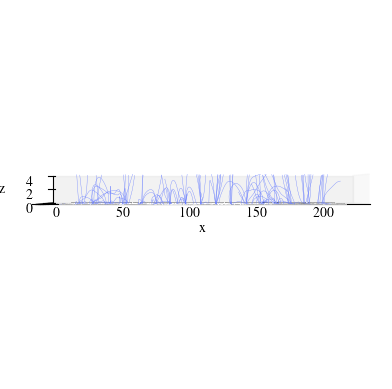

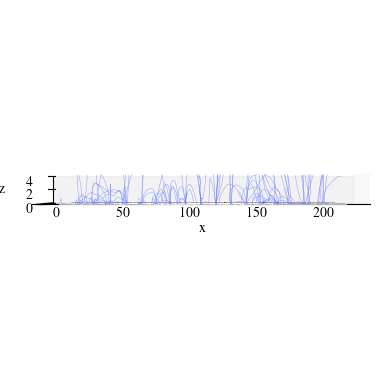

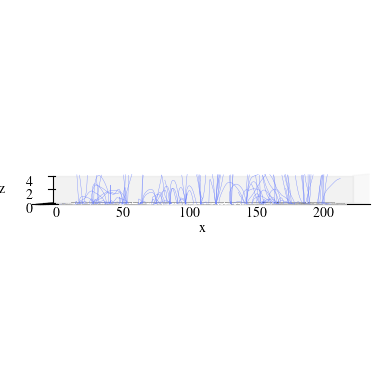

In [32]:
from mflex.plot.plot_magnetogram import plot_fieldlines_sdo_paper, plot_fieldlines_sdo_paper_zoom

plot_fieldlines_sdo_paper_zoom(
    bfield_lff,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    z0,
    0.0,
    b,
    0.0025,
    stepsize=12.0,
    view="side",
    cmap=cmap,
)

plot_fieldlines_sdo_paper_zoom(
    bfield_mhs2,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    z0,
    0.4,
    b,
    0.0025,
    stepsize=12.0,
    view="side",
    cmap=cmap,
)

plot_fieldlines_sdo_paper_zoom(
    bfield_mhs1,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    z0,
    0.2,
    b,
    0.0025,
    stepsize=12.0,
    view="side",
    cmap=cmap,
)

In [33]:
dden_mhs2 = np.load("/Users/lilli/Desktop/Paper/dden_sdo_mhs.npy")
dpres_mhs2 = np.load("/Users/lilli/Desktop/Paper/dpres_sdo_mhs.npy")

dden_mhs1 = np.load("/Users/lilli/Desktop/Paper/dden_sdo_mhs2.npy")
dpres_mhs1 = np.load("/Users/lilli/Desktop/Paper/dpres_sdo_mhs2.npy")

dden_lff = np.load("/Users/lilli/Desktop/Paper/dden_sdo_lff.npy")
dpres_lff = np.load("/Users/lilli/Desktop/Paper/dpres_sdo_lff.npy")

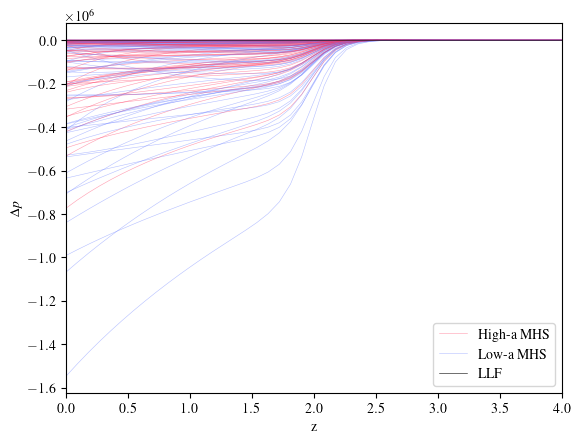

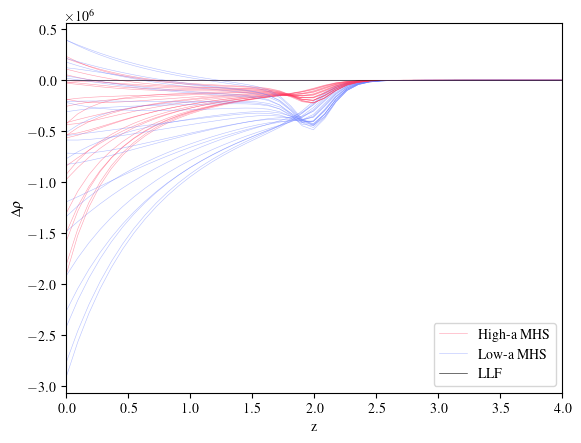

In [39]:
ix_max = np.unravel_index(data_bz.argmax(), data_bz.shape)[1]
iy_max = np.unravel_index(data_bz.argmax(), data_bz.shape)[0]

c4 = (1.000, 0.224, 0.376)

plt.plot(
    z_arr,
    dpres_mhs1[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color=c4,
    alpha=0.5,
    label="High-a MHS",
)
plt.plot(
    z_arr,
    dpres_mhs2[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color=c2,
    alpha=0.5,
    label="Low-a MHS",
)
for ix in range(120, 307, 6):
    for iy in range(123, 148, 12):
        plt.plot(
            z_arr,
            dpres_mhs1[iy, ix, :],
            linewidth=0.4,
            linestyle="solid",
            color=c4,
            alpha=0.5,
        )
        plt.plot(
            z_arr,
            dpres_mhs2[iy, ix, :],
            linewidth=0.4,
            linestyle="solid",
            color=c2,
            alpha=0.5,
        )
plt.plot(
    z_arr,
    dpres_lff[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color="black",
    label="LLF",
)
plt.xlim([0, 2 * z0])
plt.ylabel(r"$\Delta p$")
plt.xlabel("z")
plt.legend()
plotname = "/Users/lilli/Desktop/Paper/SDO_dpres.png"
plt.savefig(plotname, dpi=300)
plt.show()



plt.plot(
    z_arr,
    dden_mhs1[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color=c4,
    alpha=0.5,
    label="High-a MHS",
)
plt.plot(
    z_arr,
    dden_mhs2[0, 0, :],
    linewidth=0.4,
    linestyle="solid",
    color=c2,
    alpha=0.5,
    label="Low-a MHS",
)
for ix in [278, 279, 280, 281, 282, 283]:
    for iy in [158, 159, 160, 161]:
        plt.plot(
            z_arr,
            dden_mhs1[iy, ix, :],
            linewidth=0.4,
            linestyle="solid",
            color=c4,
            alpha=0.5,
        )
        plt.plot(
            z_arr,
            dden_mhs2[iy, ix, :],
            linewidth=0.4,
            linestyle="solid",
            color=c2,
            alpha=0.5,
        )
plt.plot(
    z_arr,
    dden_lff[iy_max, ix_max, :],
    linewidth=0.4,
    linestyle="solid",
    color="black",
    label="LLF",
)
plt.xlim([0, 2 * z0])
plt.ylabel(r"$\Delta \rho$")
plt.xlabel("z")
plt.legend()
plotname = "/Users/lilli/Desktop/Paper/SDO_dden.png"
plt.savefig(plotname, dpi=300)
plt.show()